<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Reactions_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-04-02 23:59:56,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,realbafomet,United Arab Emirates,['COVIDvaccine'],United Arab Emirates
1,2021-04-02 23:59:53,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,EVANtiel,Unknown,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Unknown
2,2021-04-02 23:59:46,RT @StephMillerShow: Stick it in! Moderna Mama...,rt stephmillershow stick moderna mama house ya...,anessia40,Unknown,"['vaccinated', 'VaccinesWork', 'VaccinesSaveLi...",Unknown
3,2021-04-02 23:59:43,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,tammeeh,Kota Petir,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Indonesia
4,2021-04-02 23:59:43,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,shipshape555,San Diego,['COVIDvaccine'],United States
...,...,...,...,...,...,...,...
206245,2021-03-10 22:35:54,I blasted this in the car as an Army nurse gav...,blasted car army nurse gave covid vaccine toda...,MatthewDWhite2,New Orleans,"['vaccinated', 'vaccine', 'rona', 'Mississippi...",United States
206246,2021-03-10 22:35:48,2nd #Pfizer shot!! I’m vaccinated! Thank you @...,pfizer shot im vaccinated thank vanyharbor gre...,NYMetroVets,Bronx,"['Pfizer', 'Veterans', 'CovidVaccine']",United States
206247,2021-03-10 22:35:09,@Sarahluvshkey77 Tomorrow is two weeks since m...,tomorrow two weeks since second shot appointme...,G8rgrrlCheryl,Western Washington,['vaccinated'],United States
206248,2021-03-10 22:35:00,"#COVID19 vaccines are hard to come by, but the...",vaccines hard come theres new way find shot ch...,medicaldaily,New York,"['COVID19', 'COVID19vaccine', 'vaccineregistra...",United States


In [10]:
# importing pandas module  
import pandas as pd  
# importing numpy module 
import numpy as np
# importing module for regex 
import re 
import matplotlib.pyplot as plt
# reading csv file having processed tweet reactions data column 
data_frame = pd.read_csv("ProcessedCovidVaccineReact.csv")
column_selected = data_frame[["CleanedTweet"]]
data = column_selected.copy()

In [11]:
# counting the frequency of each reaction by observing tweet patterns 
data["ct1"]= data["CleanedTweet"].str.count("fever", re.I) 
data["ct2"]= data["CleanedTweet"].str.count( "chills", re.I) 
data["ct3"]= data["CleanedTweet"].str.count( "headache", re.I) 
data["ct4"]= data["CleanedTweet"].str.count( "neck pain", re.I) 
data["ct5"]= data["CleanedTweet"].str.count( "cold", re.I) 
data["ct6"]= data["CleanedTweet"].str.count( "flu", re.I) 
data["ct7"]= data["CleanedTweet"].str.count( "body pain", re.I) 
data["ct8"]= data["CleanedTweet"].str.count( "body pains", re.I)
data["ct9"]= data["CleanedTweet"].str.count( "sore arm", re.I)
data["ct10"]= data["CleanedTweet"].str.count( "arm soreness", re.I)
data["ct11"]= data["CleanedTweet"].str.count( "arm sore", re.I)
data["ct12"]= data["CleanedTweet"].str.count( "swollen", re.I)
data["ct13"]= data["CleanedTweet"].str.count( "injection area", re.I)
data["ct14"]= data["CleanedTweet"].str.count( "tender arm", re.I)
data["ct15"]= data["CleanedTweet"].str.count( "cough", re.I)
data["ct16"]= data["CleanedTweet"].str.count( "coughing", re.I)
data["ct17"]= data["CleanedTweet"].str.count( "sore throat", re.I)

data["ct18"]= data["CleanedTweet"].str.count( "all good", re.I)
data["ct19"]= data["CleanedTweet"].str.count( "so good", re.I)
data["ct20"]= data["CleanedTweet"].str.count( "so safe", re.I)
data["ct21"]= data["CleanedTweet"].str.count( "all safe", re.I)
data["ct22"]= data["CleanedTweet"].str.count( "no side affect", re.I)
data["ct23"]= data["CleanedTweet"].str.count( "no side affects", re.I)

In [12]:
#aggrigating the similar reactions to one type
data["Fever"] = data["ct1"] 
data["Chills"] = data["ct2"]
data["Headache"]= data["ct3"] 
data["Neck_pain"]= data["ct4"]
data["Cold"]= data["ct5"] + data["ct6"]
data["Body_pains"]= data["ct7"] + data["ct8"]
data["Arm_soreness"]= data["ct9"] + data["ct10"]+ data["ct11"]+ data["ct12"]+ data["ct13"]+ data["ct14"]
data["Cough"]= data["ct15"] + data["ct16"]+ data["ct17"]
data["No_reactions"]= data["ct18"] + data["ct19"]+ data["ct20"]+ data["ct21"]+ data["ct22"]+ data["ct23"]

In [13]:
data

,CleanedTweet,ct1,ct2,ct3,ct4,ct5,ct6,ct7,ct8,ct9,ct10,ct11,ct12,ct13,ct14,ct15,ct16,ct17,ct18,ct19,ct20,ct21,ct22,ct23,Fever,Chills,Headache,Neck_pain,Cold,Body_pains,Arm_soreness,Cough,No_reactions
0,rt ichaydon year ago tried moderna vaccine see...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,rt hotvickkrishna need two doses mrna vaccine ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,rt stephmillershow stick moderna mama house ya...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,rt hotvickkrishna need two doses mrna vaccine ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,rt ichaydon year ago tried moderna vaccine see...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206245,blasted car army nurse gave covid vaccine toda...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206246,pfizer shot im vaccinated thank vanyharbor gre...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206247,tomorrow two weeks since second shot appointme...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206248,vaccines hard come theres new way find shot ch...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#dropping the previous count coloumns to clean the dataframe
dat_frame = data.drop(['ct1', 'ct2','ct3','ct4','ct5','ct6','ct7','ct8','ct9','ct10','ct11','ct12','ct13','ct14','ct15','ct16','ct17','ct18','ct19','ct20','ct21','ct22','ct23'], axis=1)

In [6]:
#aggrigating the results and storing into dictionary and representing it through data frame
dict = dat_frame.sum(axis = 0, skipna = True)
df = pd.DataFrame(list(dict.items()),columns = ['Reactions','Reaction Count']) 
df['Percentage_Reactions']=df['Reaction Count'].value_counts(normalize=True) * 100

In [15]:
dict = dat_frame.sum(axis = 0, skipna = True)
df = pd.DataFrame(list(dict.items()),columns = ['Reactions','Reaction Count']) 
df

,Reactions,Reaction Count
0,Fever,625.0
1,Chills,354.0
2,Headache,623.0
3,Neck_pain,2.0
4,Cold,1243.0
5,Body_pains,34.0
6,Arm_soreness,776.0
7,Cough,113.0
8,No_reactions,38.0


In [16]:
# Plotting graphs for the reactions observed from the tweets using plotly
import plotly.express as px 
fig = px.scatter(df, x="Reactions", y="Reaction Count",
                 color="Reactions",
                 size='Reaction Count', 
                 hover_data=['Reaction Count'])
  
fig.show()

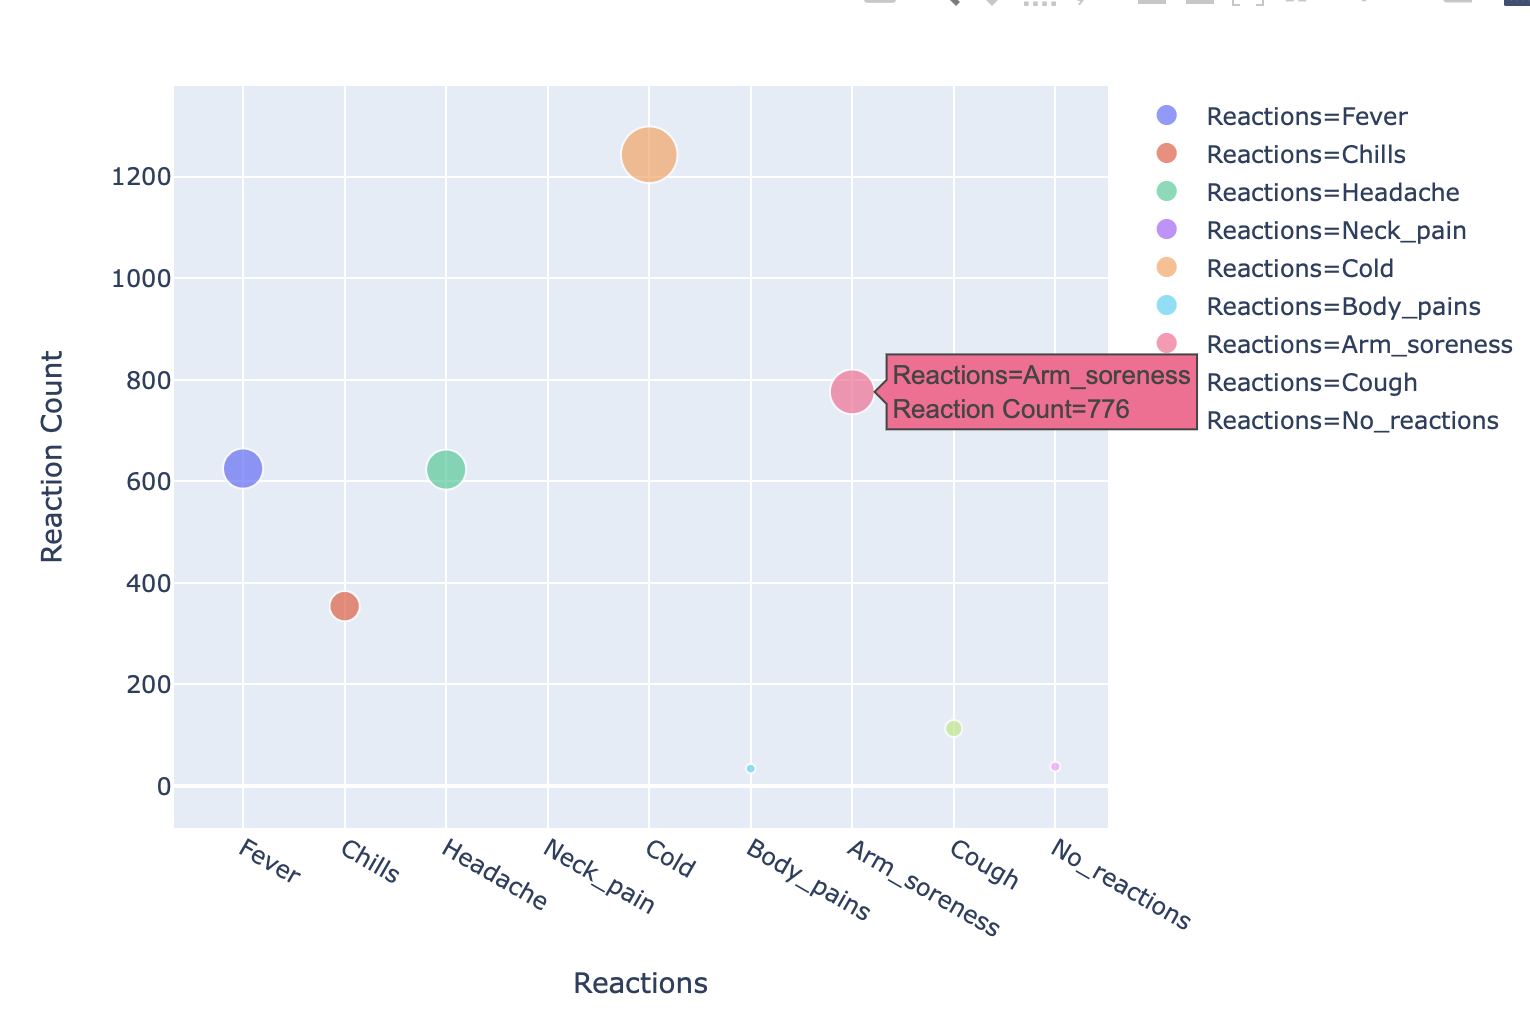